In [80]:
import pandas as pd
import numpy as np
import matplotlib.style as style

In [3]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")


In [4]:
df1 = df.drop(['Lat','Long'], axis = 1)

In [5]:
df2 = df1[df1['Country/Region'].duplicated()==True].groupby('Country/Region').sum()

In [6]:
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,4,5,5,6,9,9,...,5701,5799,5911,6008,6112,6200,6212,6249,6312,6337
Canada,0,0,0,0,1,1,2,2,2,4,...,15313,16499,17768,19231,20608,21749,22731,23947,25164,26338
China,547,634,905,1367,2015,2807,5403,5935,7941,9565,...,81675,81728,81819,81892,81950,82023,82143,82222,82315,82365
Denmark,0,0,0,0,0,0,0,0,0,0,...,4692,5082,5413,5646,5830,6007,6185,6329,6522,6692
France,0,0,2,3,3,3,4,5,5,5,...,98891,109993,113882,118698,125848,130644,133584,137789,131275,134496
Netherlands,0,0,0,0,0,0,0,0,0,0,...,18855,19635,20605,21821,23163,24479,25654,26618,27488,28223
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,52240,55910,61435,65824,74557,79826,85149,89513,94788,99402


In [7]:
China = df2[df2.index == 'China']
Canada = df2[df2.index == 'Canada']
data1 = {'Canada': np.array(Canada.stack()), "China":np.array(China.stack())}

In [8]:
df_canada_vs_china = pd.DataFrame(columns = ['Canada','China'],index = df2.columns, data = data1)

In [189]:
df_canada_vs_china

,Canada,China
1/22/20,0,547
1/23/20,0,634
1/24/20,0,905
1/25/20,0,1367
1/26/20,1,2015
...,...,...
4/11/20,21749,82023
4/12/20,22731,82143
4/13/20,23947,82222
4/14/20,25164,82315


In [190]:
df_canada_vs_china_rollingdiff = pd.DataFrame(data = df_canada_vs_china.diff(), 
                                             columns = ['Canada','China'])
df_canada_vs_china_rollingdiff

,Canada,China
1/22/20,NaN,NaN
1/23/20,0.0,87.0
1/24/20,0.0,271.0
1/25/20,0.0,462.0
1/26/20,1.0,648.0
...,...,...
4/11/20,1141.0,73.0
4/12/20,982.0,120.0
4/13/20,1216.0,79.0
4/14/20,1217.0,93.0


In [10]:
import seaborn as sns
import pyecharts as pct
import matplotlib.pyplot as plt

In [ ]:
x=[]
x_axis_ticks = df_canada_vs_china.index
for i in range(0,len(x_axis_ticks),3):
    x.append(x_axis_ticks[i])
    x.append(' ')
    x.append(' ')

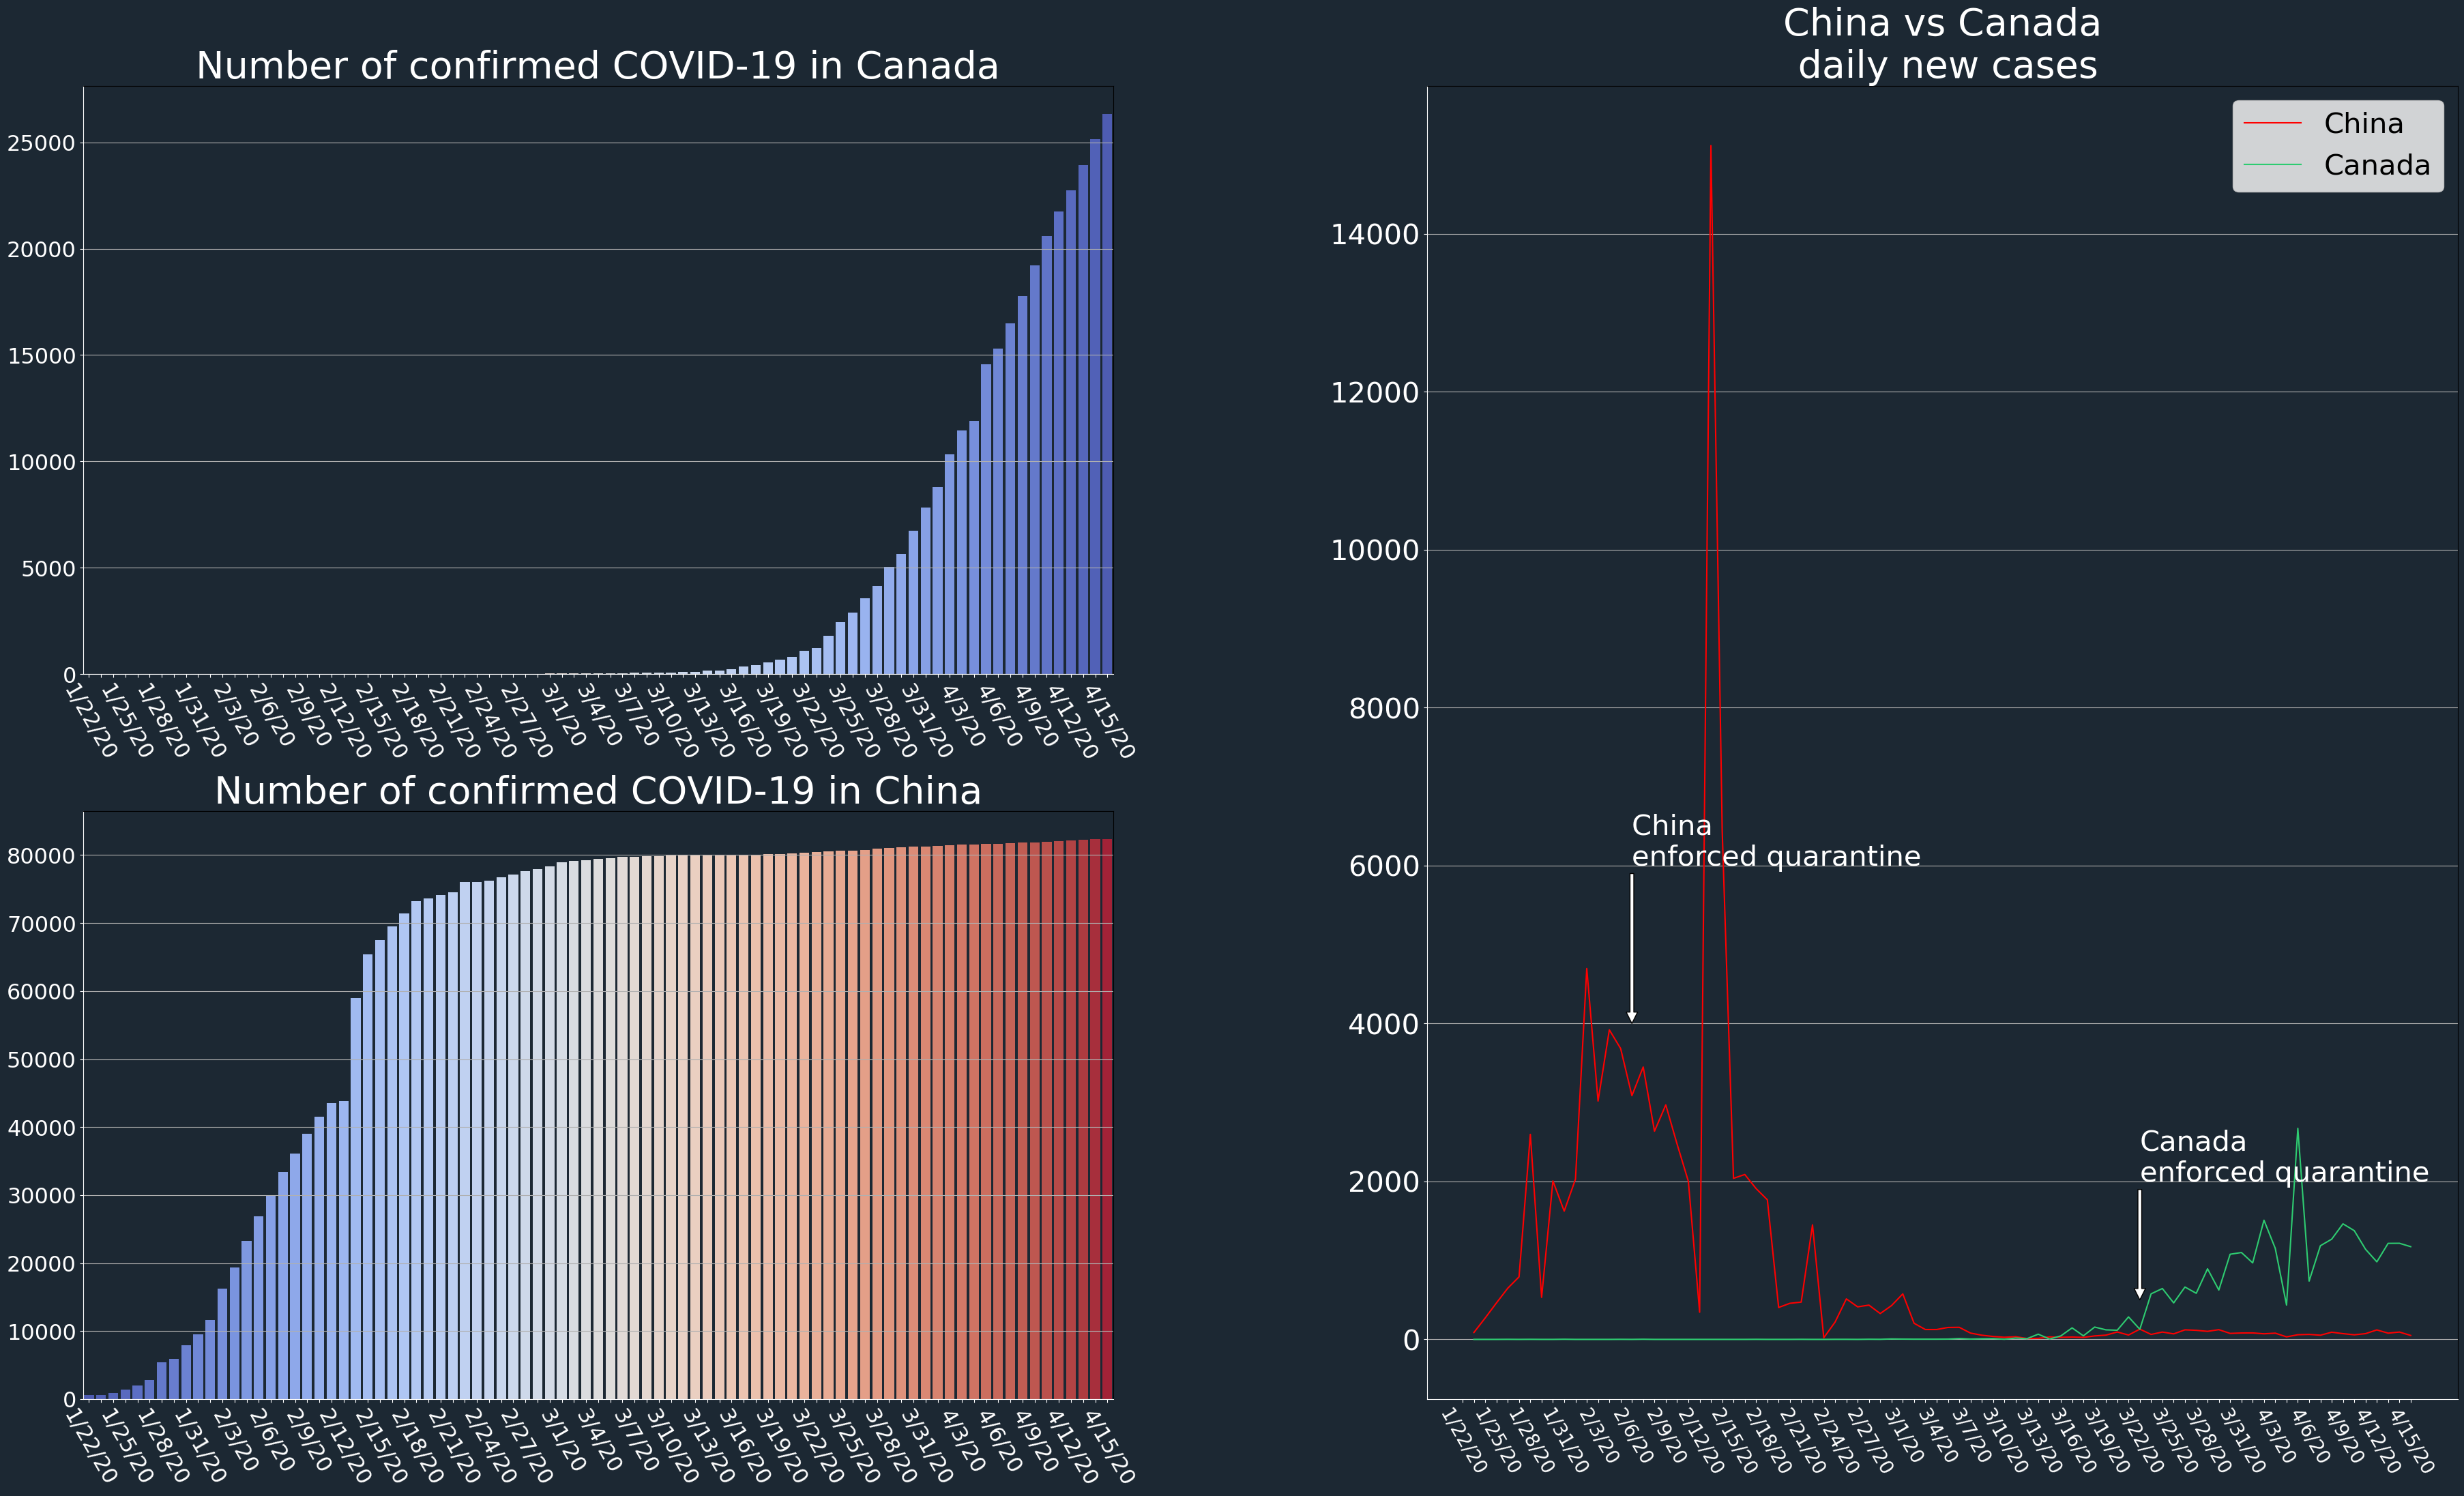

In [188]:
face_color = '#1C2833'


fig = plt.figure(figsize = (10,25))
fig.set_facecolor(face_color)
plt.rcParams['figure.facecolor'] = 'white'
canada_axis = plt.subplot2grid((10,10),(0,0),rowspan = 5,colspan = 4)
china_axis = plt.subplot2grid((10,10),(5,0),rowspan = 5,colspan = 4)
new_case_axis = plt.subplot2grid((10,10),(0,5),rowspan = 10,colspan = 4)

sns.barplot(x= df_canada_vs_china.index, y="Canada", 
             data=df_canada_vs_china,
             ax = canada_axis,
             palette = sns.color_palette("coolwarm_r",len(df_canada_vs_china),),
)
canada_axis.set_xticklabels(x, rotation=-60,fontdict = {'fontsize':20}, color = 'w')
canada_axis.tick_params(labelsize=23,axis = 'both',labelcolor='w',color = 'w')
canada_axis.set_title("Number of confirmed COVID-19 in Canada",color = 'w',fontsize = 40)
canada_axis.set_ylabel(ylabel = '')
canada_axis.set_facecolor(face_color)
canada_axis.yaxis.grid()
canada_axis.spines['bottom'].set_color('w')
canada_axis.spines['left'].set_color('w')

sns.barplot(x= df_canada_vs_china.index, y="China", 
            data=df_canada_vs_china,ax = china_axis,
            palette = sns.color_palette("coolwarm",len(df_canada_vs_china)))
china_axis.set_xticklabels(x, rotation=-60,fontdict = {'fontsize':20}, color = 'w')
china_axis.tick_params(labelsize=23, axis = 'both',labelcolor='w',color = 'w')
china_axis.set_title("Number of confirmed COVID-19 in China",color = 'w',fontsize = 40)
china_axis.set_ylabel(ylabel = '')
china_axis.set_facecolor(face_color)
china_axis.yaxis.grid()
china_axis.spines['bottom'].set_color('w')
china_axis.spines['left'].set_color('w')

new_case_axis.plot(df_canada_vs_china_rollingdiff['China'],
                   color = 'r',
                  label = 'China')
new_case_axis.plot(df_canada_vs_china_rollingdiff['Canada'],
                   color = '#2ECC71',
                  label = 'Canada')

new_case_axis.tick_params(labelsize=30,axis = 'both',labelcolor='w',color = 'w')
new_case_axis.set_xticklabels(x, rotation=-60,fontdict = {'fontsize':20}, color = 'w')
new_case_axis.annotate('China \nenforced quarantine', 
                       xy = (15,4000),xytext = (15,6000),
                       fontsize=30,
                       color = 'w',
                       arrowprops=dict(facecolor='w', shrink=5),
                      )
new_case_axis.annotate('Canada\nenforced quarantine', 
                       xy = (60,500),xytext = (60,2000),
                       fontsize=30,
                       color = 'w',
                       arrowprops=dict(facecolor='w', shrink=5),
                      )
new_case_axis.set_title("China vs Canada\n daily new cases",color = 'w',fontsize = 40)
new_case_axis.yaxis.grid()
new_case_axis.set_facecolor(face_color)
new_case_axis.spines['bottom'].set_color('w')
new_case_axis.spines['left'].set_color('w')



legend = plt.legend(fontsize = 30)
plt.setp(legend.get_texts(), color='black')
plt.subplots_adjust(left=None, bottom=None, right=4, top=None,
                wspace=None, hspace=17)



In [25]:

from pyecharts.charts import Line
import pyecharts.options as opts


In [33]:
line = Line(init_opts=opts.InitOpts(width="1000px", height="800px"))

line.add_xaxis(list(df_canada_vs_china_rollingdiff.index[-30:]))

line.add_yaxis("Canada",
               list(df_canada_vs_china_rollingdiff['Canada'][-30:]),
               markpoint_opts=opts.MarkPointOpts(
                   data=[opts.MarkPointItem(type_="max", name="maximum value"),
                         opts.MarkPointItem(type_="min", name="minimum value"),]),
               is_symbol_show= True,
)
line.add_yaxis("China",
               list(df_canada_vs_china_rollingdiff['China'][-30:]),
               markpoint_opts=opts.MarkPointOpts(
                   data=[opts.MarkPointItem(type_="max", name="maximum value"),
                         opts.MarkPointItem(type_="min", name="minimum value"),]),
               is_symbol_show= True,
              )


line.set_global_opts(title_opts=opts.TitleOpts(title="China vs Canada daily new cases"))
line.render_notebook()
